## API Client ##

### Project Group D , Option C - Part 5

Directions:

Get the jsons generated from your annexed group and plot it. First, try to connect tothe private ip of your annexed group. If it is not possible because of physical issues,then simply use what they generate copying it. If your annexed group cannot giveyou the necessary json, then annotate it, use the json of another group. If there areno jsons from other groups, then use your json from your own API

In [22]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Para la prueba con nuestra API (del grupo D)
#
#    id_group = "D128"               # Id group 
#    host_id = "192.168.0.185"       # Private IP of the group
#    url_s = "http://" + host_id + ":6060/"
#    endpoint = "get/token"
#    url_w = url_s + endpoint + "?id="+ id_group
#    tok = requests.get(url_w).json()
#    token_id = tok["token"]
#    endpoint = "get/df"
#    url_w = url_s + endpoint +  "?tok="+ token_id
#    col = "t_d_averages"
#    df = requests.get(url_w).json()
#

In [24]:
# Con la información del grupo A        
#url_grupoA = "http://192.168.0.116:6060/get_data/?id=A249191580208185295299619560"
#col = "new_cases"
#id_group = "A137"   
#df = requests.get(url_grupoA).json()

In [26]:
# Con la información del grupo C (Nuestro grupo proveedor)        

url_grupoC = "http://192.168.0.96:6060/get/Json?token_id=C5221570662008902e"
col = "t_c_averages"
id_group = "C133"   
df = requests.get(url_grupoC).json()            # Obtiene un diccionario con los datos


In [27]:
dicc_data = df[col]                             # Información del diccionario 

In [28]:
final_df = pd.DataFrame([[key, dicc_data[key]] for key in dicc_data.keys()], columns=['date', col])

In [29]:
final_df["date"]= pd.to_datetime(final_df["date"], format = "%Y-%m-%d")

In [30]:
final_df.set_index("date", inplace=True)

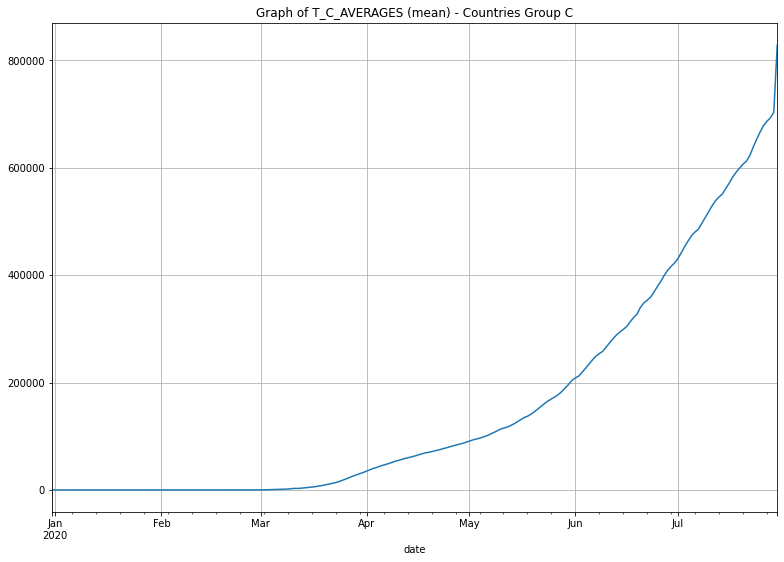

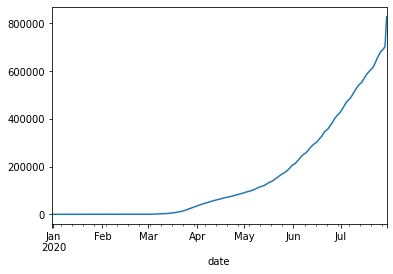

<Figure size 432x288 with 0 Axes>

In [67]:
plt.figure()
plt.plot()

final_df[col].plot(title = "Graph of " + col.upper() + " (mean) - " + "Countries Group " + id_group[0] , grid = True, figsize=(13,9)) 
plt.show()
plt.savefig(col+ ".png",bbox_inches='tight')

#Otra forma
final_df[col].plot(kind='line',y=col)
#plt.xlabel ("Item")             #EJEMPLO para la etiqueta del eje X
#plt.ylabel ("Quantity")         #EJEMPLO para la etiqueta del eje y
#plt.title ("Top 5 items bought")    #EJEMPLO para el titulo
plt.show()
plt.savefig(col+ ".pdf",bbox_inches='tight')